#Diabetes prediction with MLP
Óscar Poblete Sáenz <br> Course: Introduction to Artificial Intelligence<br>
Teacher: Elizabeth Guevara Martinez<br>
Universidad Anáhuac <br>

In [ ]:
#Import libraries
import numpy as np # Linear algebra
import pandas as pd # Data analysis and manipulation
from sklearn.model_selection import train_test_split # Split data into train and test sets
from sklearn.preprocessing import StandardScaler # Preprocess and standardize data
from sklearn.neural_network import MLPClassifier #MLP, we could also use regression
from sklearn.metrics import confusion_matrix #Confusion matrix


In [ ]:
#Retrieve file data and display certain amount of rows
data=pd.read_csv('diabetes.csv')
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# Descriptive statistics for databases
# Mean
data['Age'].mean()

33.240885416666664

In [ ]:
# Standard deviation
data['Age'].std()

11.760231540678685

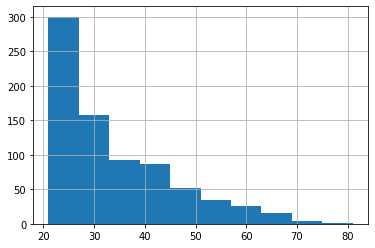

In [ ]:
# Histogram
data['Age'].hist()

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Get all the descriptive statistics in a single table of all the variables
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee15b48490>,
      dtype=object)

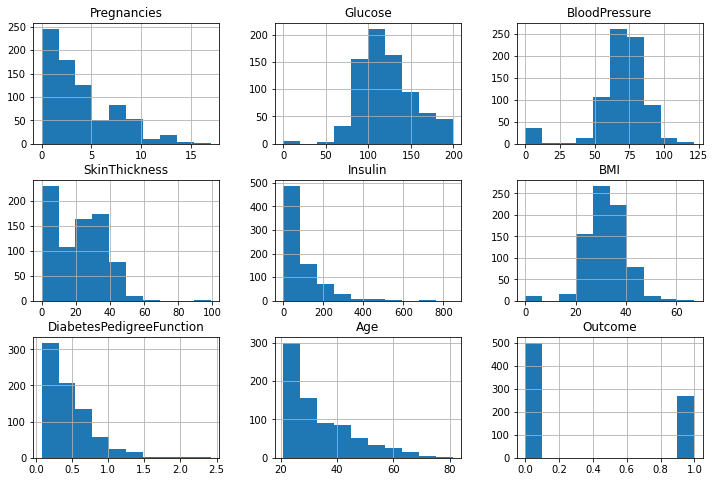

In [ ]:
# Display histograms of each variable with a certain window size
data.hist(figsize=(12,8))

In [ ]:
# Data cleansing
# Verify that there are no null records
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Analyze that the data is consistent. For example: glucose and blood pressure cannot be at zero, but pregnancy can.
# We eliminate those values that do not make sense
print("Dimensions before correction: ",data.shape)
diabetes=data.drop(data[data['Glucose']==0].index)
diabetes=diabetes.drop(diabetes[diabetes['BloodPressure']==0].index)
diabetes=diabetes.drop(diabetes[diabetes['BMI']==0].index)
diabetes=diabetes.drop(diabetes[diabetes['Insulin']==0].index)
diabetes=diabetes.drop(diabetes[diabetes['SkinThickness']==0].index)
# Verify correction
print("Dimensions after correction:",diabetes.shape)

In [ ]:
x=diabetes.iloc[:,:-1].values # Save all the columns except the last one (output)
x

array([[  1.   ,  89.   ,  66.   , ...,  28.1  ,   0.167,  21.   ],
       [  0.   , 137.   ,  40.   , ...,  43.1  ,   2.288,  33.   ],
       [  3.   ,  78.   ,  50.   , ...,  31.   ,   0.248,  26.   ],
       ...,
       [  2.   ,  88.   ,  58.   , ...,  28.4  ,   0.766,  22.   ],
       [ 10.   , 101.   ,  76.   , ...,  32.9  ,   0.171,  63.   ],
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ]])

In [ ]:
y=diabetes.iloc[:,-1].values # Save the outputs of all rows
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [ ]:
# Standardize data, put them at the same level or ranges
x=StandardScaler().fit_transform(x)
x

array([[-0.7174265 , -1.09104581, -0.37365481, ..., -0.710421  ,
        -1.03187632, -0.9682991 ],
       [-1.02921274,  0.46631407, -2.45696436, ...,  1.42673006,
         5.11511079,  0.2095853 ],
       [-0.09385402, -1.44794079, -1.65569146, ..., -0.29723846,
        -0.79712575, -0.47751393],
       ...,
       [-0.40564026, -1.12349081, -1.01467313, ..., -0.66767798,
         0.70411863, -0.87014206],
       [ 2.08864966, -0.70170584,  0.42761809, ..., -0.02653266,
        -1.0202837 ,  3.15429628],
       [ 0.52971846, -0.05280589,  0.10710893, ..., -0.9811268 ,
        -0.80582021, -0.0848858 ]])

In [ ]:
# Generate seed so that the data does not change and you have the same training and test data set
np.random.seed(1)

In [ ]:
# Split the data into training and test
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3) # Generally 70% is used for training and 30% for testing. Training data must not be the same as test data

# Define the multilayer perceptron
model=MLPClassifier(solver='lbfgs', max_iter=1000, hidden_layer_sizes=4)
# We must establish the parameters and apply the stochastic gradient as optimizer, the maximum number of iterations and the architecture.
# The lbfgs optimizer is used for small data sets, adam for large data sets (detects flats and slopes), and sgd for both.

# Train the model to find the weights that solve the problem
model.fit(x_train,y_train) 


MLPClassifier(hidden_layer_sizes=4, max_iter=1000, solver='lbfgs')

In [ ]:
# Evaluate the model
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
# Check accuracy (number of hits/total data)
score=model.score(x_test,y_test)
score

# If the score is 1.0 the system works 100%

0.7288135593220338

In [ ]:
# Evaluate the behavior of the model and its results
confusionM=confusion_matrix(y_test,y_pred)
print(confusionM)
# It is necessary to ensure that the precision is good according to the confusion matrix, avoiding large amounts in orange zones.
# The numbers represent the number of elements of each class. As well as the combinations between false and positive

[[66 16]
 [16 20]]


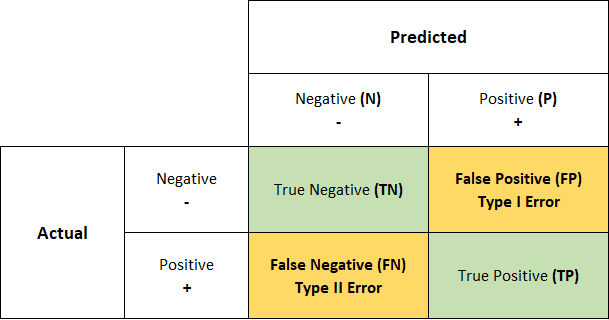<br>
Type I Error: <i>The predicted value is positive but the real one is false</i> <br>
Type II Error:<i> The predicted value is false but the real one is positive </i>